## Problem 2:
Prepare rules for the Movies data set 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

## Import necessary libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Matplotlib configurations

# Display interactive plots. Used this since convenient for displaying plots in github.
# %matplotlib notebook
%matplotlib notebook
# Font and figure size:
# Ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Load data

In [3]:
movies_df = pd.read_csv('my_movies.csv')

In [4]:
movies_df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


## Data understanding

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


### Observations:
- The dataset contains info about movies, probably brought at a dvd store(not enough info available) by customers.
- It consits of 10 records and 15 columns (10 different movies + V1 - V5). It has been divided into two portions, text data containing original information and binary data which is actually a one hot encoded form of the original data.
- There are null values in the text part of the dataset and not in the binary part.

In [6]:
# Seperate text part nd transaction encode so as to verify if it matches with the 
# encoded part. If true, we can use the encoded part for our analysis.
movies_txt = movies_df.iloc[:, :5]

In [7]:
movies_list = movies_txt.fillna('').values.tolist()

In [8]:
movies_list

[['Sixth Sense', 'LOTR1', 'Harry Potter1', 'Green Mile', 'LOTR2'],
 ['Gladiator', 'Patriot', 'Braveheart', '', ''],
 ['LOTR1', 'LOTR2', '', '', ''],
 ['Gladiator', 'Patriot', 'Sixth Sense', '', ''],
 ['Gladiator', 'Patriot', 'Sixth Sense', '', ''],
 ['Gladiator', 'Patriot', 'Sixth Sense', '', ''],
 ['Harry Potter1', 'Harry Potter2', '', '', ''],
 ['Gladiator', 'Patriot', '', '', ''],
 ['Gladiator', 'Patriot', 'Sixth Sense', '', ''],
 ['Sixth Sense', 'LOTR', 'Gladiator', 'Green Mile', '']]

In [9]:
te = TransactionEncoder() # Transaction encoder to get the text data in the required format for apriori algorithm.
te_ary = te.fit(movies_list).transform(movies_list)
df = pd.DataFrame(te_ary, columns=te.columns_).drop('', axis=1)
df

,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
0,False,False,True,True,False,False,True,True,False,True
1,True,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,True,False,False
3,False,True,False,False,False,False,False,False,True,True
4,False,True,False,False,False,False,False,False,True,True
5,False,True,False,False,False,False,False,False,True,True
6,False,False,False,True,True,False,False,False,False,False
7,False,True,False,False,False,False,False,False,True,False
8,False,True,False,False,False,False,False,False,True,True
9,False,True,True,False,False,True,False,False,False,True


** Note:** This is same as the encoded part which is separated below. We can use this or we can used the encoded part itself( as done in the below analysis).

In [10]:
# Separating the encoded part.
movies_enc =  movies_df.iloc[:, 5:]

In [11]:
movies_enc

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [12]:
# Mean along the columns, to help estimate min support score.
support_per_movie = movies_enc.mean(axis=0)
support_per_movie

Sixth Sense      0.6
Gladiator        0.7
LOTR1            0.2
Harry Potter1    0.2
Patriot          0.6
LOTR2            0.2
Harry Potter2    0.1
LOTR             0.1
Braveheart       0.1
Green Mile       0.2
dtype: float64

In [13]:
min(support_per_movie), max(support_per_movie)

(0.1, 0.7)

## Observations:
- The support scores for each of the products is within the range (0.1, 0.7). ( 1 - 7 transactions)
- We can expect the support scores for two movies to be less than 0.7 , for three still less etc.
- For this problem, we can try the following min_support thresholds [0.1, 0.3, 0.6] (arbitarily chosen)

In [14]:
support = [0.1, 0.3, 0.6]
confidence = [0.5, 0.7]

In [15]:
# Creating a dictionary to contain association rules for each support threshold,
# and for each confidence threshold per support threshold.
freq_set_per_suport = dict.fromkeys(support) # Dictionary to contain frequent items.
rules_set = dict.fromkeys(support) # Dictionary to contain association rules.
for s_val in support:
    frequent_itemsets = apriori(movies_enc, min_support=s_val, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) # col to contain length of itemsets.
    freq_set_per_suport[s_val] = frequent_itemsets # Store freuent items for each support in dictionary.

    rules_per_sup_val = []
    for c_val in confidence:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=c_val)
        rules_per_sup_val.append(rules)
    rules_set[s_val] = rules_per_sup_val

#### Frequent itemsets and rules for support = 0.1 and confidence = 0.5

In [16]:
freq_set_per_suport[0.1].head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


In [17]:
freq_set_per_suport[0.1].head().tail()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


In [18]:
rules_set[0.1][0].head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


#### Frequent itemsets and rules for support = 0.1 and confidence = 0.7

In [19]:
freq_set_per_suport[0.1].head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


In [20]:
rules_set[0.1][1].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


#### Frequent itemsets and rules for support = 0.3 and confidence = 0.5

In [21]:
freq_set_per_suport[0.3]

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.4,"(Sixth Sense, Patriot)",2
5,0.6,"(Gladiator, Patriot)",2
6,0.4,"(Sixth Sense, Patriot, Gladiator)",3


In [22]:
rules_set[0.3][0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


#### Frequent itemsets and rules for support = 0.3 and confidence = 0.7

In [23]:
freq_set_per_suport[0.3].head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.4,"(Sixth Sense, Patriot)",2


In [24]:
rules_set[0.3][1].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


#### Frequent itemsets and rules for support = 0.6 and confidence = 0.5

In [25]:
freq_set_per_suport[0.6].head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.6,"(Gladiator, Patriot)",2


In [26]:
rules_set[0.6][0].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


#### Frequent itemsets and rules for support = 0.6 and confidence = 0.7

In [27]:
freq_set_per_suport[0.6].head()

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.6,"(Gladiator, Patriot)",2


In [28]:
rules_set[0.6][1].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


<IPython.core.display.Javascript object>


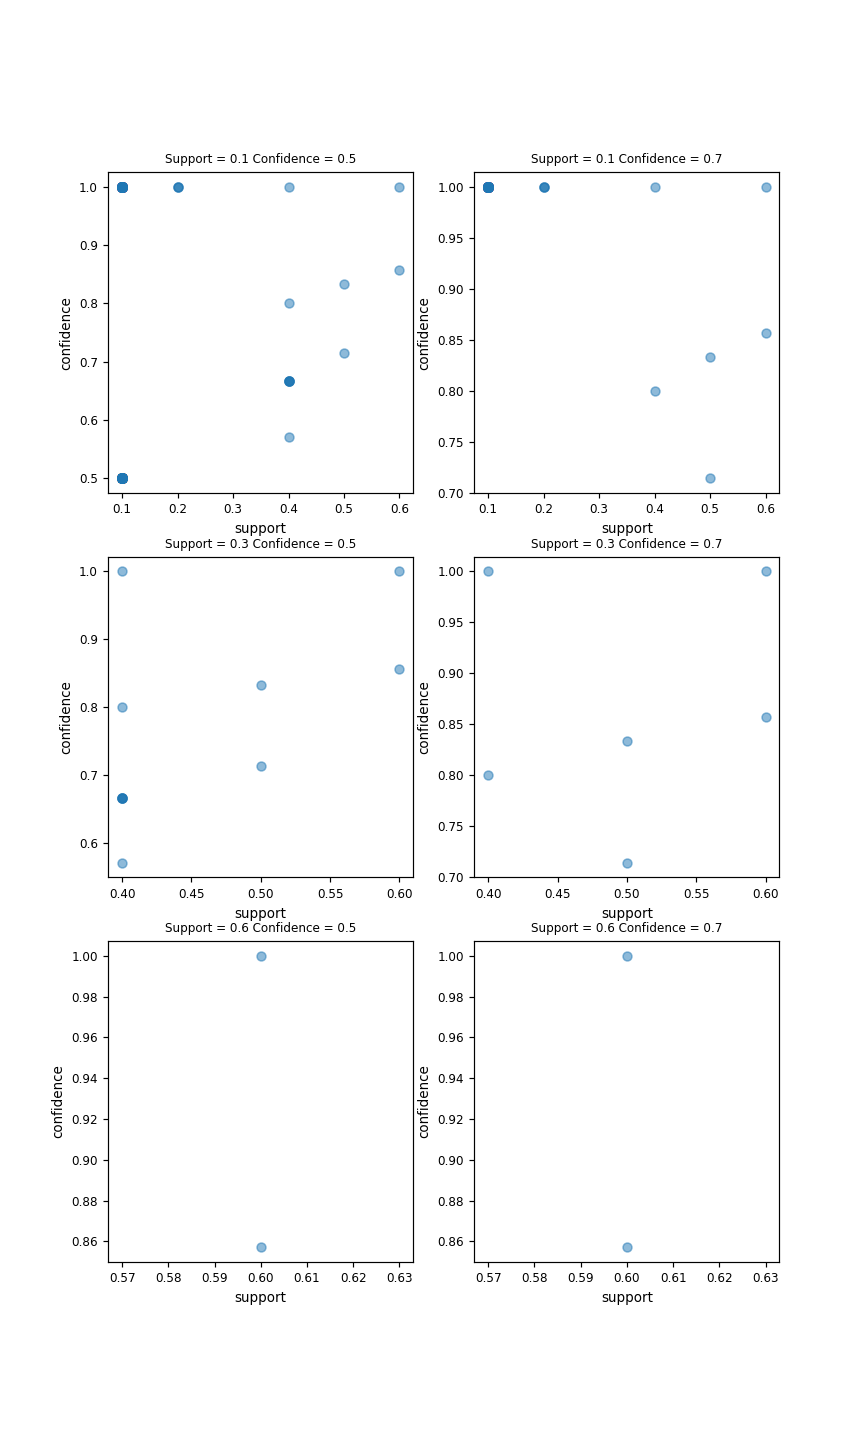

In [29]:
## Visualizing the results:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9,15))

for i in range(len(support)): # i is the key index
    key = support[i]
    n_vals = len(confidence)
    for j in range(n_vals):
        rules_df = rules_set[key][j] # j is the value index for the respective "key"
        ax[i,j].scatter(rules_df['support'], rules_df['confidence'], alpha = 0.5)
        ax[i,j].set_xlabel('support')
        ax[i,j].set_ylabel('confidence')
        ax[i,j].set_title('Support = {} Confidence = {}'.format(support[i],confidence[j]))
plt.show()

## Filtering rows and modifying the Max length parameter:

### Filtering rows by length

In [30]:
sup_key = 0.1 # consider a support val of 0.1 for illustration.
freq_itemsets = freq_set_per_suport[sup_key]

In [31]:
freq_itemsets['length'].unique() # find out how many diiferent types of sets are there.

array([1, 2, 3, 4, 5], dtype=int64)

In [32]:
freq_itemsets[(freq_itemsets['length'] == 3) # Filter rows that contain 3 items in an itemset (for illustration)
            & (freq_itemsets['support'] >=0.1)]

,support,itemsets,length
30,0.4,"(Sixth Sense, Patriot, Gladiator)",3
31,0.1,"(LOTR, Sixth Sense, Gladiator)",3
32,0.1,"(Sixth Sense, Green Mile, Gladiator)",3
33,0.1,"(LOTR1, Sixth Sense, Harry Potter1)",3
34,0.1,"(LOTR1, Sixth Sense, LOTR2)",3
35,0.1,"(LOTR1, Sixth Sense, Green Mile)",3
36,0.1,"(Sixth Sense, LOTR2, Harry Potter1)",3
37,0.1,"(Sixth Sense, Green Mile, Harry Potter1)",3
38,0.1,"(Sixth Sense, Green Mile, LOTR2)",3
39,0.1,"(LOTR, Sixth Sense, Green Mile)",3


### Changing the max_lenth parameter and obtaining corresponding association rules.

In [33]:
# Creating a dictionary to contain association rules for each support threshold,
# and for each confidence threshold per support threshold.
freq_set_per_suport1 = dict.fromkeys(support)
rules_set1 = dict.fromkeys(support) 
for s_val in support:
    frequent_itemsets = apriori(movies_enc, min_support=s_val, use_colnames=True, max_len=3)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) # col to contain length of itemsets.
    freq_set_per_suport1[s_val] = frequent_itemsets # Store freuent items for each support in dictionary.

    rules_per_sup_val = []
    for c_val in confidence:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=c_val)
        rules_per_sup_val.append(rules)
    rules_set1[s_val] = rules_per_sup_val

#### Frequent itemsets and rules for support = 0.3 and confidence = 0.5

In [34]:
freq_set_per_suport1[0.3]

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.4,"(Sixth Sense, Patriot)",2
5,0.6,"(Gladiator, Patriot)",2
6,0.4,"(Sixth Sense, Patriot, Gladiator)",3


In [35]:
# Confidence level = 0.5
rules_set[0.3][0].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


In [36]:
# Confidence level = 0.7
rules_set[0.3][1].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


**Note:** the number of row is lessser after applying max_length filter to the apriori algorithm compared to before.This can also be seen in the reduction in number of points in the scatterplots. As before we can extract the association rules from the dictionary created above for the required support and confidence values. 

<IPython.core.display.Javascript object>


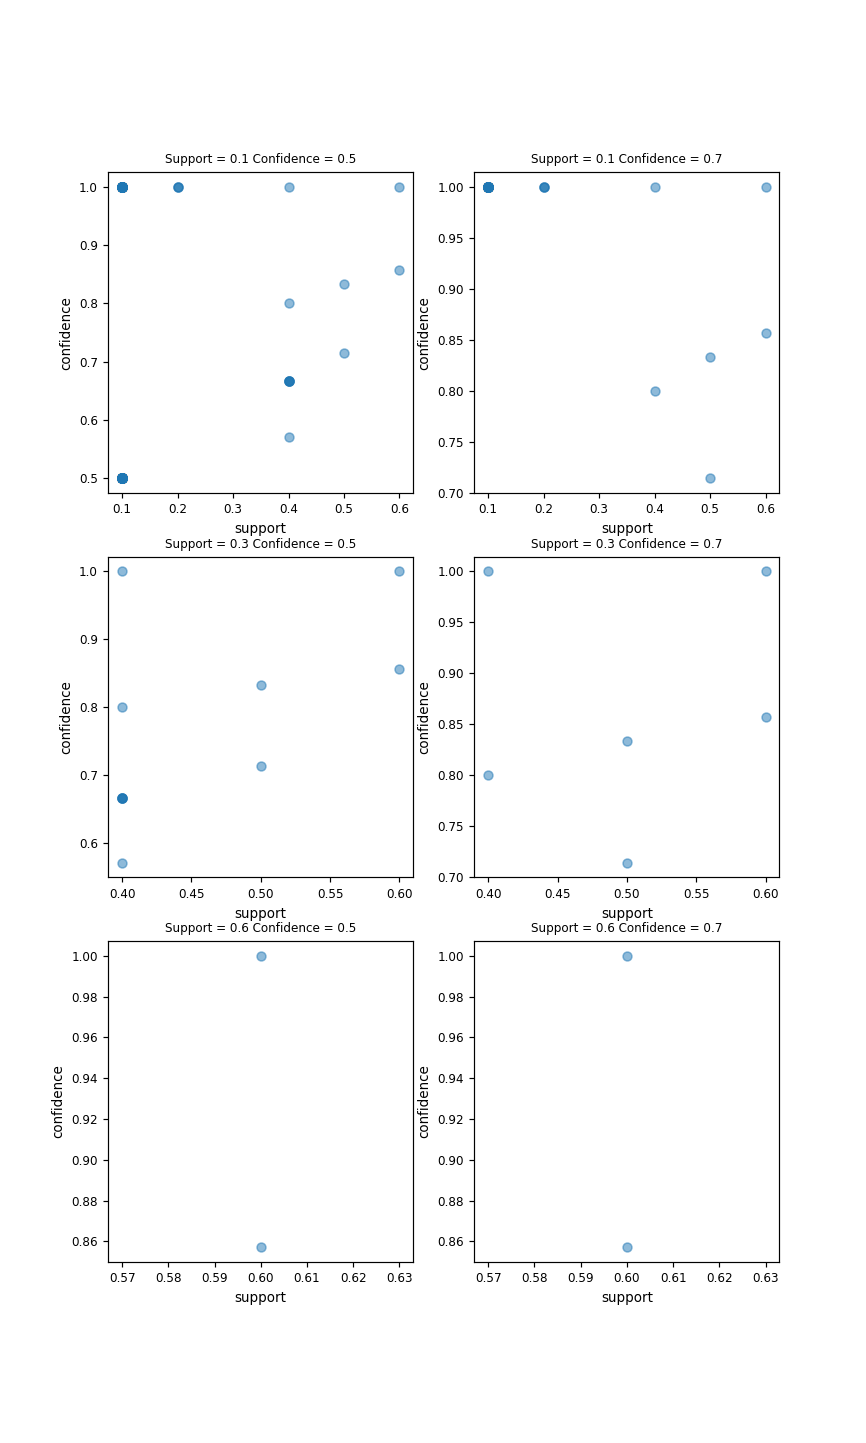

In [37]:
## Visualizing the results:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9,15))

for i in range(len(support)): # i is the key index
    key = support[i]
    n_vals = len(confidence)
    for j in range(n_vals):
        rules_df = rules_set1[key][j] # j is the value index for the respective "key"
        ax[i,j].scatter(rules_df['support'], rules_df['confidence'], alpha = 0.5)
        ax[i,j].set_xlabel('support')
        ax[i,j].set_ylabel('confidence')
        ax[i,j].set_title('Support = {} Confidence = {}'.format(support[i],confidence[j]))
plt.show()

## Conclusion:
A set of association rules and frequent item sets for different combinations of support and confidence thresholds were prepared using the apriori algorithm and visualised using scatter plots. Based on the above analysis, and further use of metrics like lift etc. a list of associated items can be extracted; for example, best possible combinations of three movies given a customer chooses one movie.